# Core science model

This notebook runs and provides analysis for the core science model.

In [1]:
import matplotlib.pyplot as plt
from science_model import ScienceModel, TALLY, TRUE

## Parameters

First we need to set the following model parameters:

| parameter | description | permissible values |
| --- | --- | --- |
| $n$ | number of agents | integral, $n > 0$ |
| $r$ | probability that an agent chooses to replicate a tested hypothesis | $0 \leq r \leq 1$ |
| $b$ | probability that a novel hypothesis is true | $0 \leq b \leq 1$ |
| $\alpha$ | type I error rate | $0 \leq \alpha \leq 1$ |
| $\beta$ | type II error rate | $0 \leq \beta \leq 1$ |
| $c_{n-}$ | probability that a negative novel result is published | $0 \leq c_{n-} \leq 1$ |
| $c_{r+}$ | probability that a positive replication result is published | $0 \leq c_{r+} \leq 1$ |
| $c_{r-}$ | probability that a negative replication result is published | $0 \leq c_{r-} \leq 1$ |

In [2]:
n = 100
r = 0.2
b = 0.1
alpha = 0.05
beta = 0.2
c_n_neg = 0.9
c_r_pos = 0.9
c_r_neg = 0.9

## Initial data

Next we need to set up at least one tested hypothesis to start the
model. Note that this initial data must follow the following schema:

```python
[{TRUE: bool, TALLY: int}, ... ]
```

In [3]:
initial_data = [{TRUE: True, TALLY: 1}]

## Running the model

First we define the number of time steps to run the model for:

In [4]:
num_steps = 200

Next, we run the model:

In [5]:
model = ScienceModel(
    n=n,
    r=r,
    b=b,
    alpha=alpha,
    beta=beta,
    c_n_neg=c_n_neg,
    c_r_pos=c_r_pos,
    c_r_neg=c_r_neg,
    initial_data=initial_data,
)

for i in range(num_steps):
    model.step()

## Analysis

First we group the tested hypotheses by tallies.

In [6]:
hypothesis_summary = {}

for hypothesis in model.tested_hypotheses:
    if hypothesis[TALLY] in hypothesis_summary:
        hypothesis_summary[hypothesis[TALLY]]["total_count"] += 1

        if hypothesis[TRUE]:
            hypothesis_summary[hypothesis[TALLY]]["true_count"] += 1
    else:
        hypothesis_summary[hypothesis[TALLY]] = {
            "total_count": 1,
            "true_count": 1 if hypothesis[TRUE] else 0,
        }

### Number of hypotheses per tally

<BarContainer object of 9 artists>

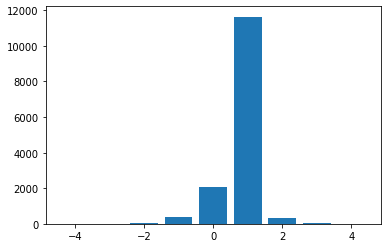

In [7]:
%matplotlib inline
tally_vals = list(sorted(hypothesis_summary.keys()))
tally_total_counts = [hypothesis_summary[t]["total_count"] for t in tally_vals]

plt.bar(tally_vals, tally_total_counts)

### Percentage true by tally

<BarContainer object of 9 artists>

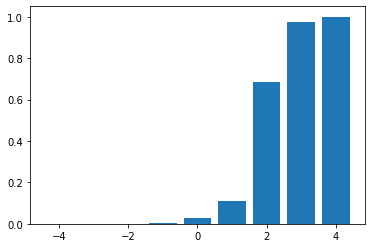

In [8]:
tally_percent_true_counts = [
    hypothesis_summary[t]["true_count"] / hypothesis_summary[t]["total_count"]
    for t in tally_vals
]

plt.bar(tally_vals, tally_percent_true_counts)